# TASK - 1 : Merge Data 

In [13]:
import pandas as pd
import glob
import os

# Paths
folder_path = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects/'
output_path = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/'
os.makedirs(output_path, exist_ok=True)  # Create output folder if not exists

file_list = glob.glob(folder_path + "*.csv")

# Load HR & HRV data
hr_data = pd.read_csv('C:/Users/Asus/Desktop/iiitnr/master_dataset.csv')

# Loop through each file, add HR & HRV, and save new CSV
for file_path in file_list:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]

    # Get HR and HRV for this subject
    hr_row = hr_data[hr_data['Subject_ID'] == subject_id]
    
    if not hr_row.empty:
        hr = hr_row['HR'].values[0]
        hrv = hr_row['HRV'].values[0]

        # Add HR & HRV columns
        df['HR'] = hr
        df['HRV'] = hrv

        # Save to new CSV
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(output_path, file_name.replace('.csv', '_updated.csv'))
        df.to_csv(new_file_path, index=False)
        print(f"Saved: {new_file_path}")
    else:
        print(f"No HR/HRV data for Subject {subject_id}, skipped.")

Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_1_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_10_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_11_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_12_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_13_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_14_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_15_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_16_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_17_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_18_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_19_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_2_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Su

# TASK - 2 : Visualize Merged PPG Data

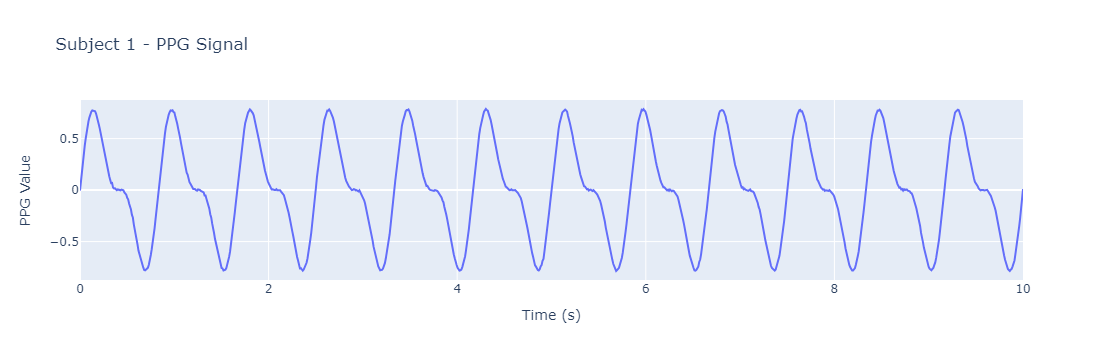

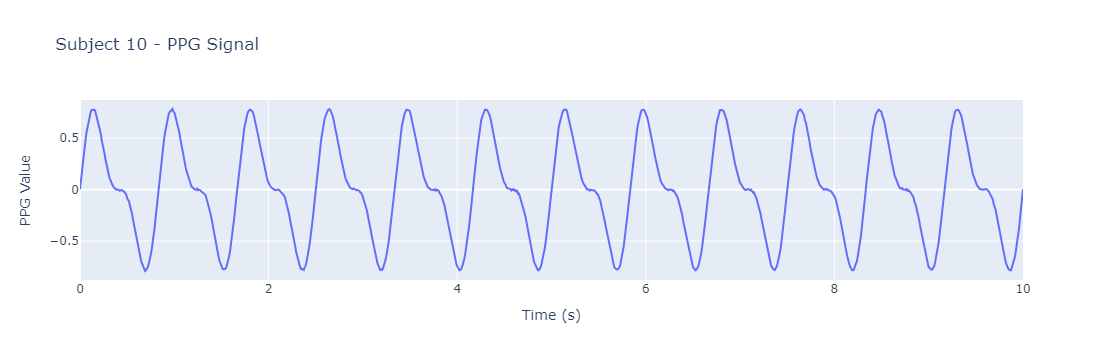

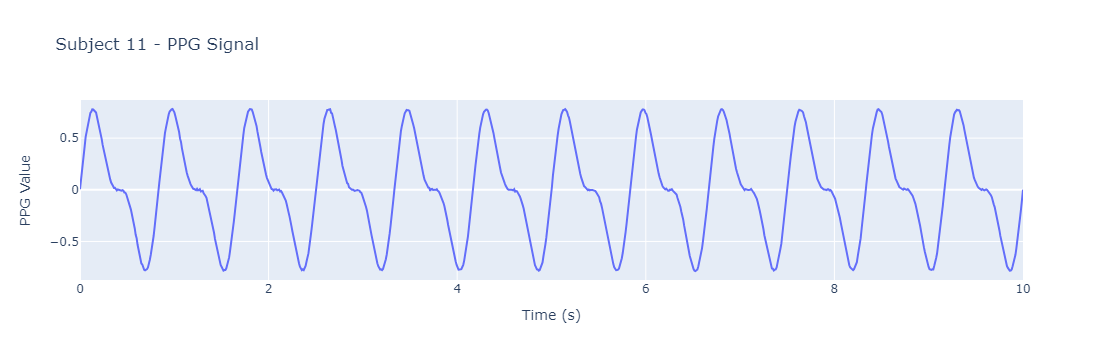

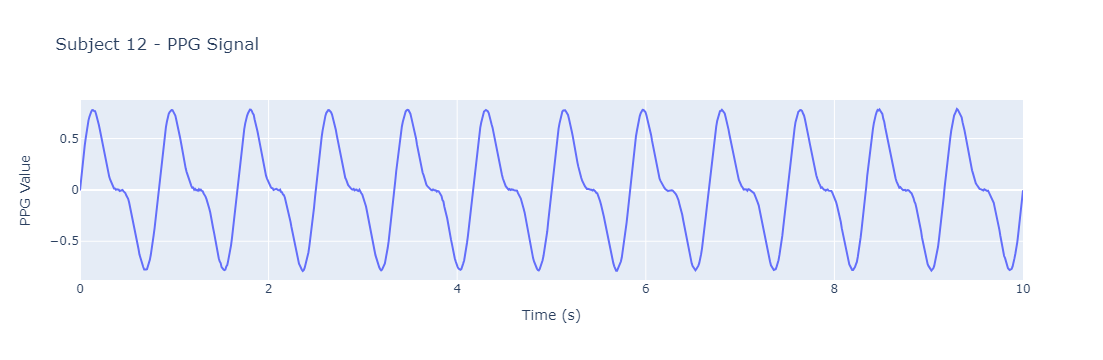

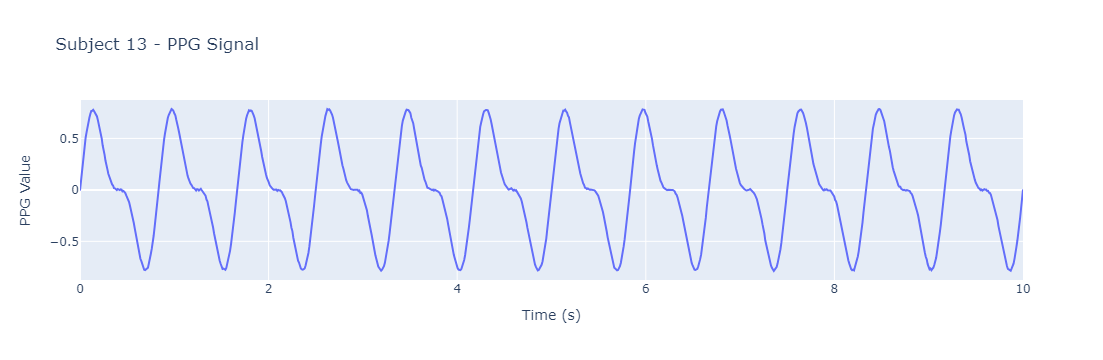

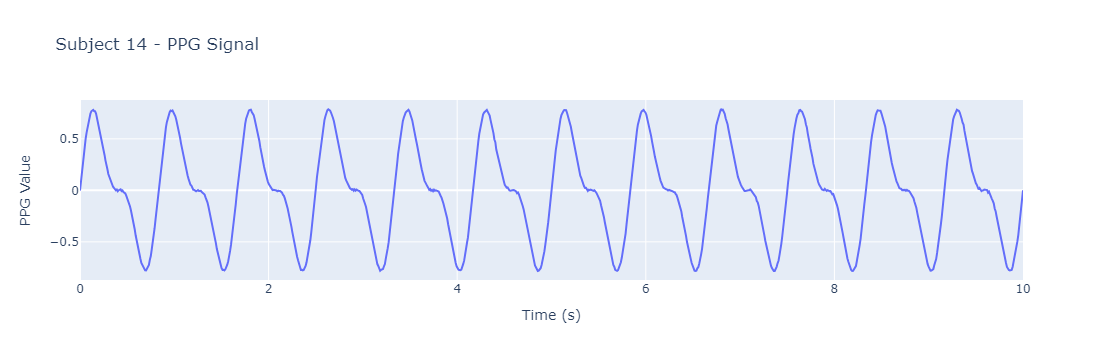

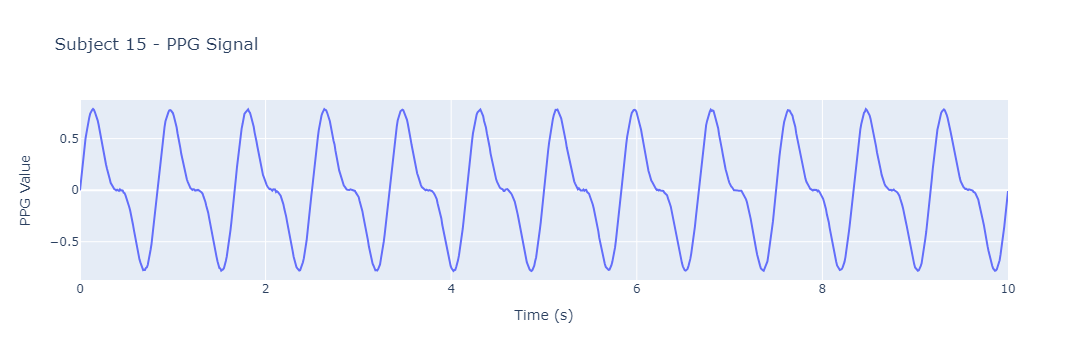

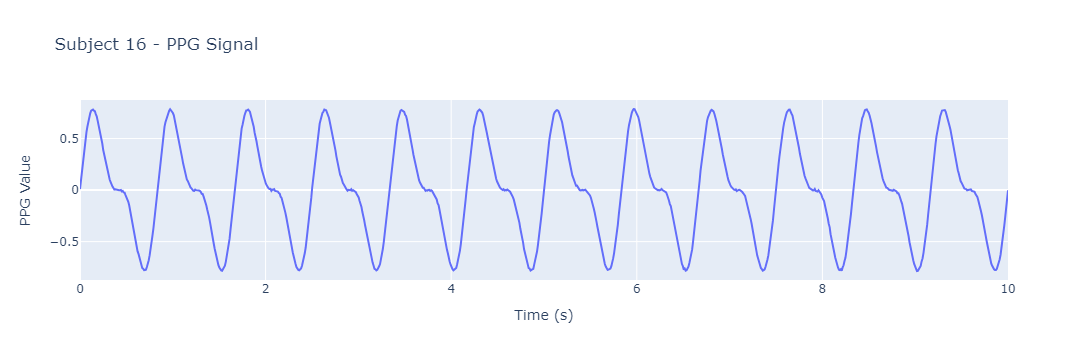

In [18]:
import pandas as pd
import plotly.express as px
import glob
import os

merged_folder = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects/'
csv_files = glob.glob(merged_folder + '*.csv')
for file_path in csv_files:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]
    fig = px.line(df, x='Time', y='PPG',
                  title=f"Subject {subject_id} - PPG Signal",
                  labels={'Time': 'Time (s)', 'PPG': 'PPG Value'})

    fig.show()


# TASK -3 : Combine and Split Data

In [39]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

merged_folder = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/'
csv_files = glob.glob(merged_folder + '*.csv')
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
print(f" Combined shape: {combined_df.shape}")
print(combined_df.head())

 Combined shape: (20000, 5)
   Subject_ID     Time       PPG  HR        HRV
0          10  0.00000  0.004478  61  90.149362
1          10  0.01001  0.095083  61  90.149362
2          10  0.02002  0.180218  61  90.149362
3          10  0.03003  0.267075  61  90.149362
4          10  0.04004  0.348273  61  90.149362


In [41]:
# (80% train, 20% test)
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, shuffle=True)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (16000, 5)
Test shape: (4000, 5)


# TASK - 4 : Build and Evaluate Models

In [43]:
# Select features and Trget
x = combined_df[['PPG', 'HRV', 'Time']]
y = combined_df['HR']

In [45]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
# Training 4 Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

In [49]:
#Evaluate each model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
result={}
prediction = {}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    prediction[name] = y_pred
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    result[name] = {"MAE":{mae},"MSE":{mse},"RMSE":{rmse},"R2":r2}

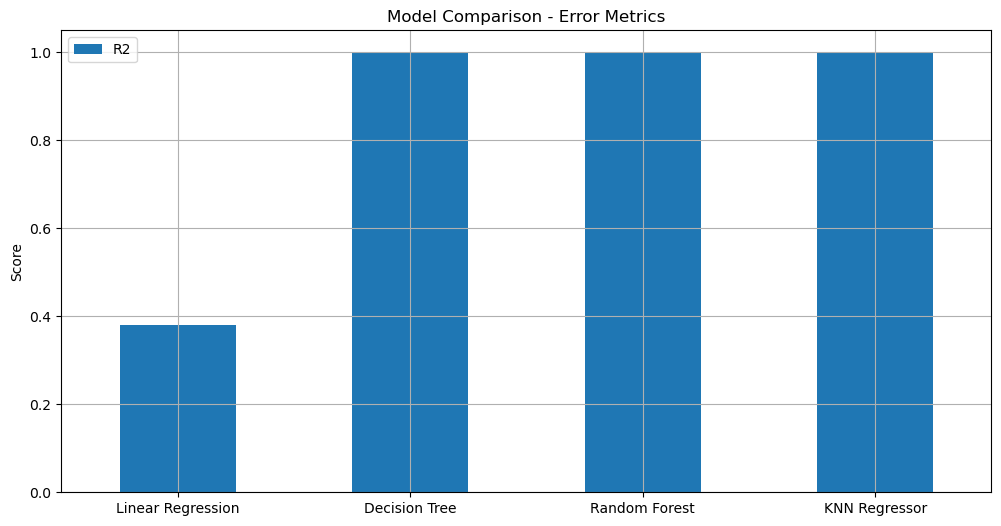

In [51]:
#Plot Evaluation Metrics
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(result).T  # transpose so models are rows

# Plot bar charts
results_df[['MAE', 'MSE', 'RMSE', 'R2']].plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison - Error Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

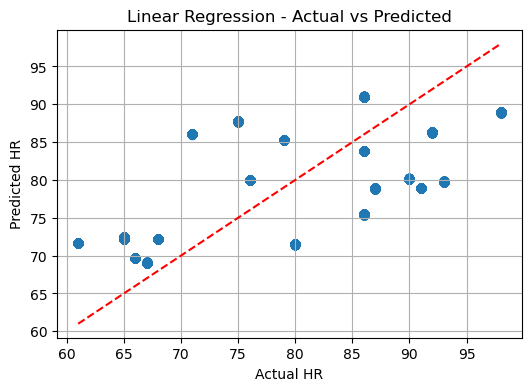

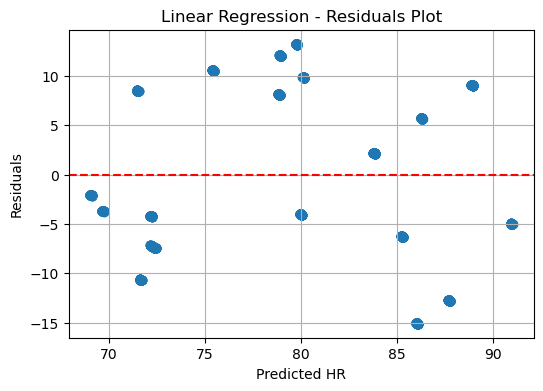

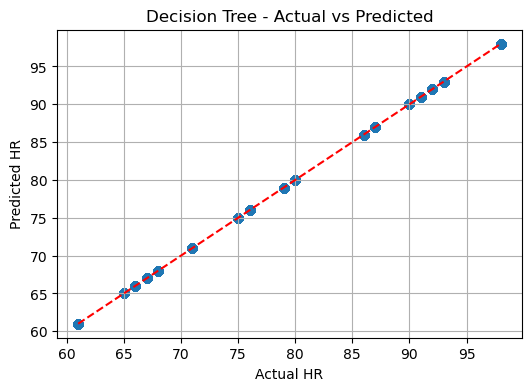

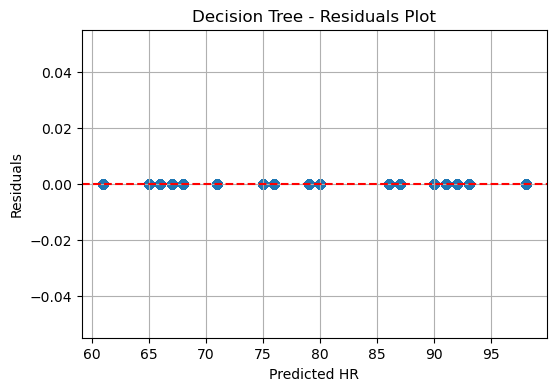

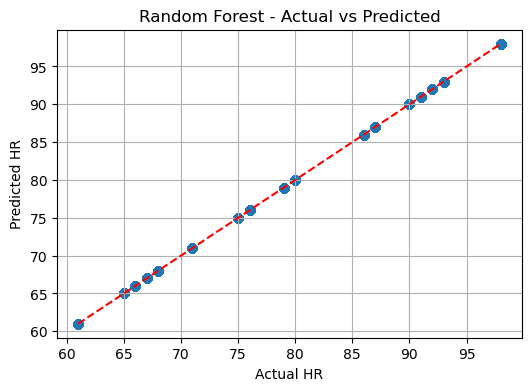

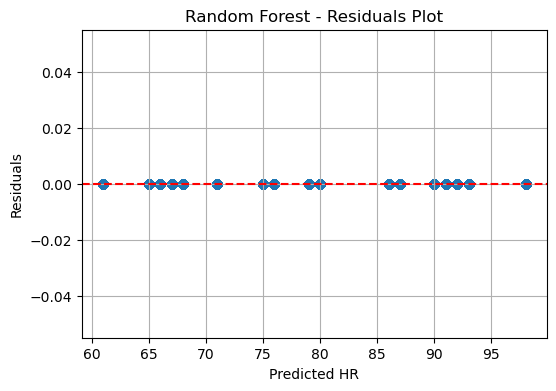

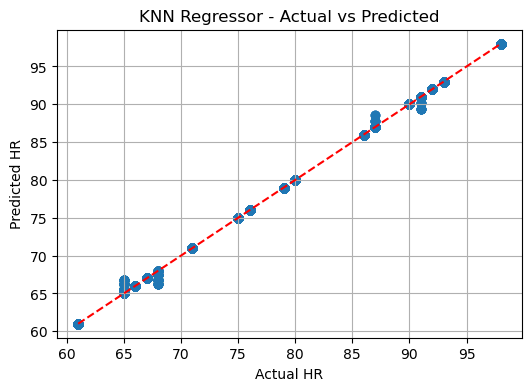

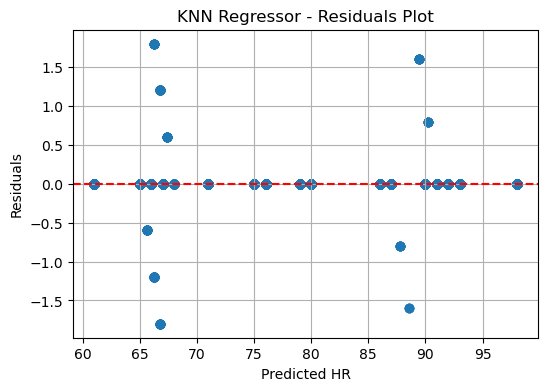

In [53]:
for name in models:
    y_pred = prediction[name]

    # Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual HR")
    plt.ylabel("Predicted HR")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted HR")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residuals Plot")
    plt.grid(True)
    plt.show()